Оцінювання наявності даної роботи буде враховувати як наявність самих візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання не буде зараховане за наявне.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [72]:
df = pd.read_csv("data/train.csv")

In [73]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

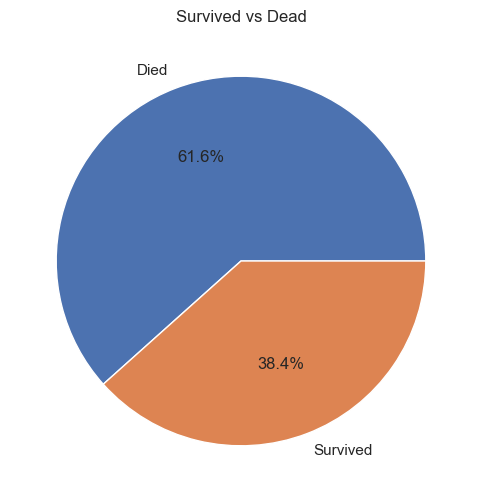

In [116]:
counts = df["Survived"].value_counts().sort_index()
labels = ["Died", "Survived"]
sizes = [counts[0], counts[1]]

plt.figure(figsize=(6,6))
plt.pie(sizes,labels=labels,autopct="%1.1f%%")
plt.title("Survived vs Dead")
plt.show()

The survival rate is close to 1/3. Which is quite small. And sad.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


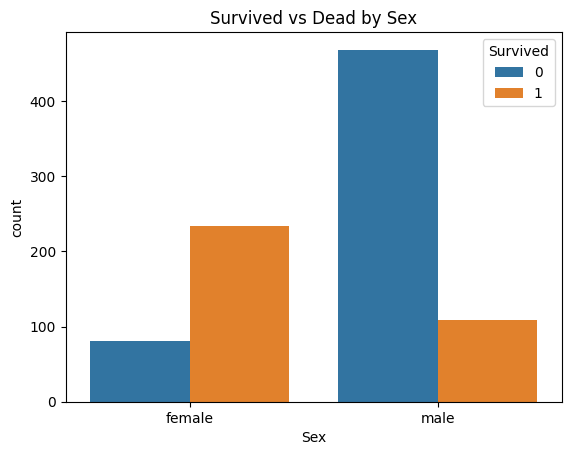

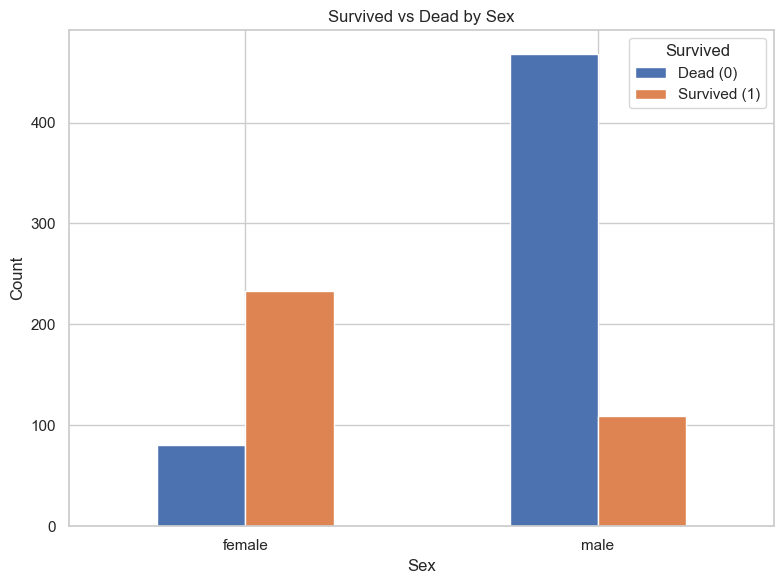

In [84]:
counts = (
    df
    .groupby(["Sex", "Survived"], as_index=False)["PassengerId"]
    .count()
    .rename(columns={"PassengerId": "count"})
)

pivot = counts.pivot(index="Sex", columns="Survived", values="count")

fig, ax = plt.subplots(figsize=(8,6))
pivot.plot(kind="bar", ax=ax)

ax.set_xlabel("Sex")
ax.set_ylabel("Count")
ax.set_title("Survived vs Dead by Sex")
ax.legend(title="Survived", labels=["Dead (0)", "Survived (1)"])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

We see a dramatic difference between survived people ratio by sex: more women survived than died, but it's vice-versa for men. We can also see that there were more male people onboard as here we deal in absolute numbers.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

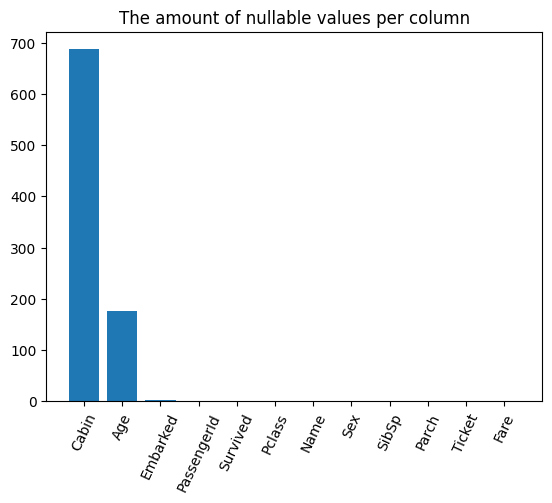

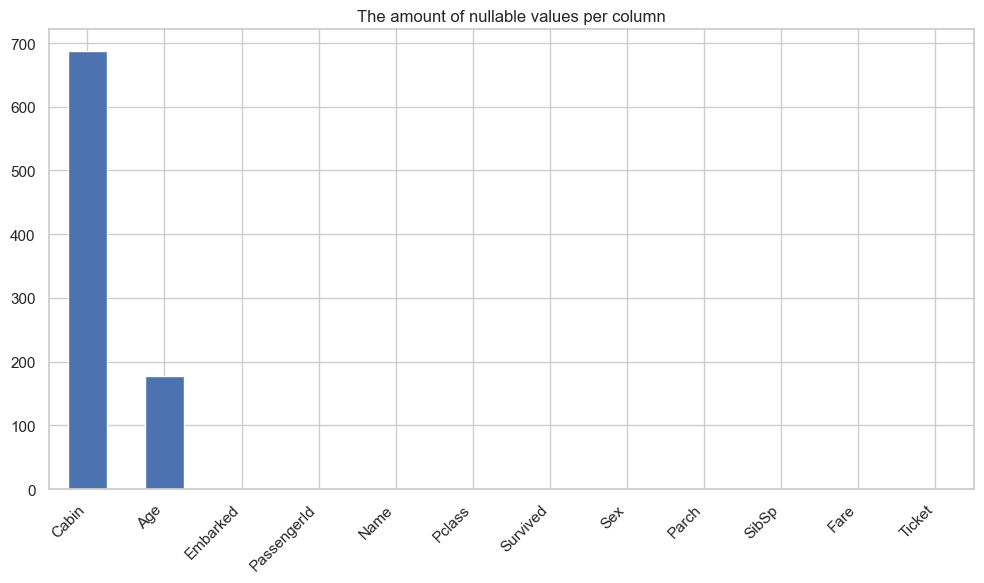

In [87]:
missing_counts = df.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_counts.plot(kind="bar")
plt.title("The amount of nullable values per column")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

A lot of info about cabin is missing or was not recorded. We can also observe some info about age is missing, that seems weird to me. Other columns contain few to no missing values, which is nice.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

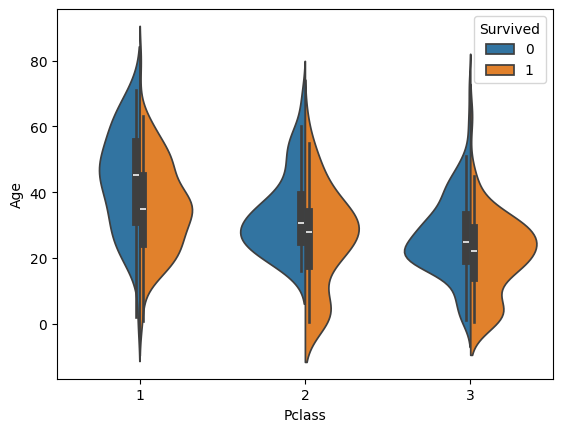

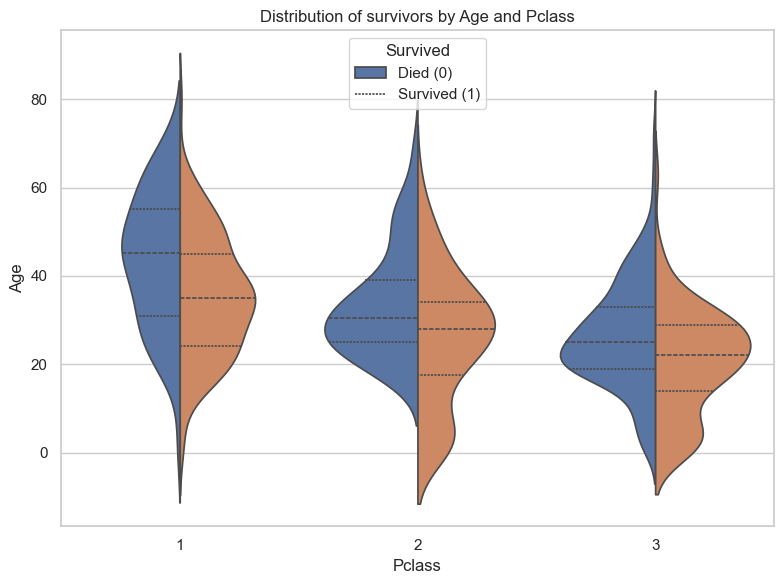

In [113]:
plt.figure(figsize=(8, 6))
ax = sns.violinplot(
    x="Pclass",
    y="Age",
    hue="Survived",
    data=df,
    split=True, 
    inner="quartile"
)

ax.set_title("Distribution of survivors by Age and Pclass")
ax.set_xlabel("Pclass")
ax.set_ylabel("Age")
ax.legend(title="Survived", labels=["Died (0)", "Survived (1)"])
plt.tight_layout()
plt.show()

It's a violin plot that helps us understand the distribution of survivors by age and pclass. It shows quite a lot of information. I believe the most interesting things are peaks that show many surviving children. While we also see there wasn't a lot of children in the first class, but more of older people (which mostly died).
Other data isn't very surprising, dead and survived peaks are practically mirrored, but with slightly different amplitude. 

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


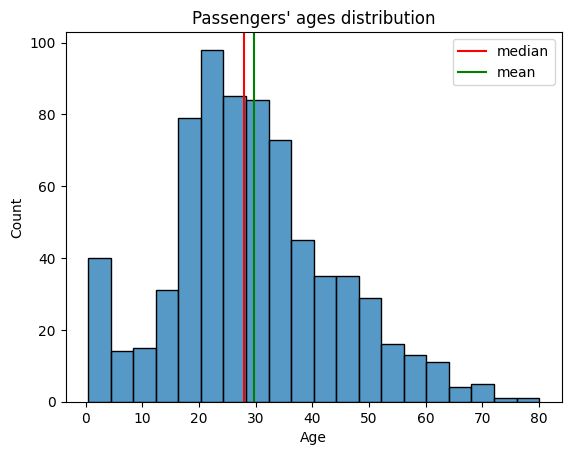

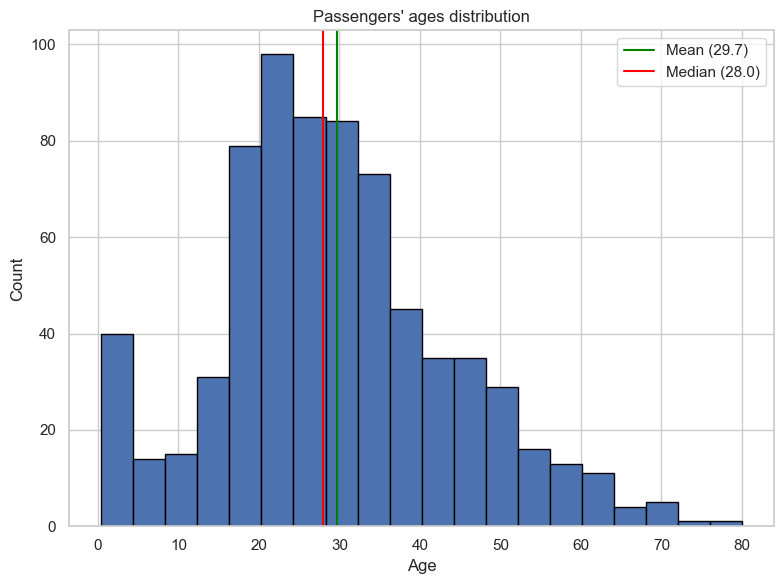

In [115]:
ages = df["Age"].dropna()

mean_age = ages.mean()
median_age = ages.median()

plt.figure(figsize=(8, 6))
plt.hist(
    ages,
    bins=20,
    edgecolor="black"
)

plt.axvline(
    mean_age,
    color="green",
    label=f"Mean ({mean_age:.1f})"
)

plt.axvline(
    median_age,
    color="red",
    label=f"Median ({median_age:.1f})"
)

plt.title("Passengers' ages distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

We may observe that most of the passengers were middle-aged. Both median and the mean are around 30 year old. There's also a peak in children count (up to toddler age).

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

What is the relationship between passenger gender, class and their chance of survival?

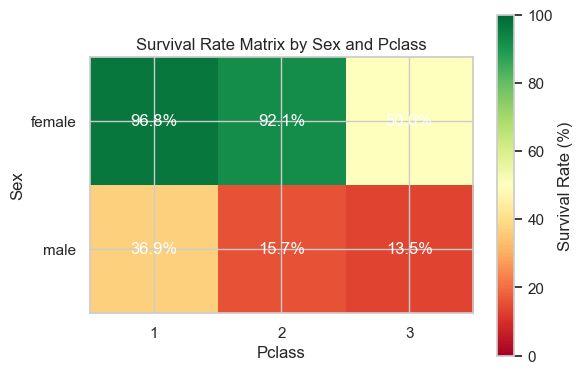

In [103]:
surv_matrix = (
    df
    .groupby(["Sex", "Pclass"], as_index=False)["Survived"]
    .mean()
    .pivot(index="Sex", columns="Pclass", values="Survived")
    * 100
)

fig, ax = plt.subplots(figsize=(6,4))
im = ax.imshow(
    surv_matrix,
    cmap="RdYlGn",
    vmin=0,
    vmax=100
)

ax.set_xticks(np.arange(len(surv_matrix.columns)))
ax.set_yticks(np.arange(len(surv_matrix.index)))
ax.set_xticklabels(surv_matrix.columns)
ax.set_yticklabels(surv_matrix.index)
ax.set_xlabel("Pclass")
ax.set_ylabel("Sex")
ax.set_title("Survival Rate Matrix by Sex and Pclass")

for i, sex in enumerate(surv_matrix.index):
    for j, cls in enumerate(surv_matrix.columns):
        rate = surv_matrix.loc[sex, cls]
        ax.text(
            j, i, f"{rate:.1f}%",
            ha='center', va='center',
            color='white'
        )

cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Survival Rate (%)')

plt.tight_layout()
plt.show()

Using this matrix we can clearly see, that women of 1 and 2 class almost all survived (92%-96%), while for women of 3 class the chance was 50%. For men the trend stays the same, but the numbers are vastly different at 13%-37%.

From this we can draw the conclusion that the main factor of survival was gender, and the class, while being important, is the secondary factor.

 # Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

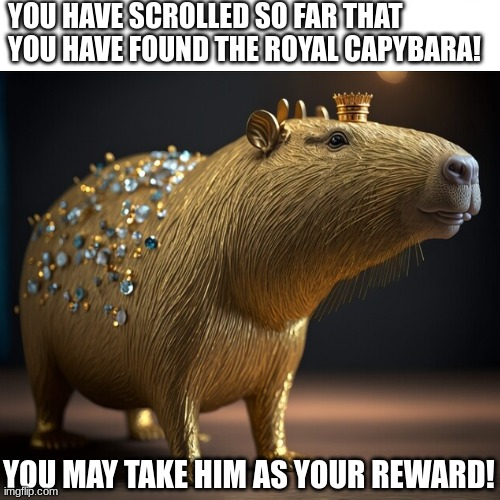